# NLP - Text Classification

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/nathan/Desktop/UPDATED_NLP_COURSE/TextFiles/moviereviews.tsv', sep = '\t')
data.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [2]:
# read some random text
print(data.review[0][:500])

how do films like mouse hunt get into theatres ? 
isn't there a law or something ? 
this diabolical load of claptrap from steven speilberg's dreamworks studio is hollywood family fare at its deadly worst . 
mouse hunt takes the bare threads of a plot and tries to prop it up with overacting and flat-out stupid slapstick that makes comedies like jingle all the way look decent by comparison . 
writer adam rifkin and director gore verbinski are the names chiefly responsible for this swill . 
th


In [3]:
print(f'We has {len(data) } notice about movies.\n')
print(f'Total missing values:\n{data.isna().sum()}')

We has 2000 notice about movies.

Total missing values:
label      0
review    35
dtype: int64


In [4]:
# dropping missing values
data.dropna(inplace = True)
print(f'Now, the total missing values:\n{data.isna().sum()}')

Now, the total missing values:
label     0
review    0
dtype: int64


In [5]:
# delete space in review column
blank = []

for i, first, sec in data.itertuples():
    if sec.isspace():
        blank.append(i)

In [6]:
data.drop(blank, inplace = True)

In [15]:
from sklearn.model_selection import train_test_split

X = data.review
y = data.label

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfid', TfidfVectorizer()), 
                     ('model', LinearSVC())])
text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfid', TfidfVectorizer()), ('model', LinearSVC())])

In [20]:
# predict
y_pred = text_clf.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_true = y_test, y_pred = y_pred))
print(f'The Accuracy is: {accuracy_score(y_true = y_test, y_pred = y_pred)}')

              precision    recall  f1-score   support

         neg       0.85      0.83      0.84       282
         pos       0.85      0.86      0.85       300

    accuracy                           0.85       582
   macro avg       0.85      0.85      0.85       582
weighted avg       0.85      0.85      0.85       582

The Accuracy is: 0.8487972508591065


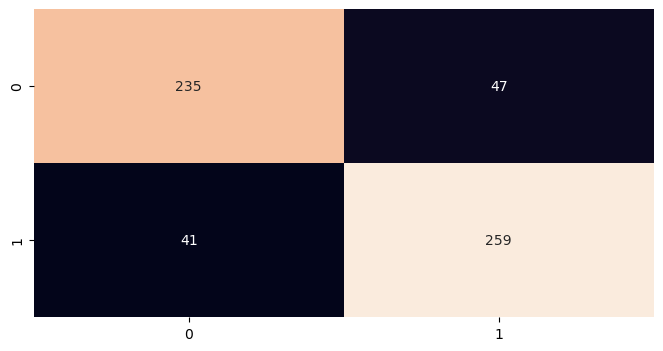

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (8,4))
matrix = confusion_matrix(y_true = y_test, y_pred = y_pred)
sns.heatmap(matrix, annot = True, fmt = 'g', cbar = False)
plt.show()

In [52]:
text_clf.predict(["Introduction How many comedy movies have you watched? Okay, and how many of them would you like to watch again? And again? To me, 90% of modern comedies are possible to watch only once – and sometimes it’s better to not watch them at all. Jokes in such comedies are mostly based on sex or…"])

array(['neg'], dtype=object)